<a href="https://colab.research.google.com/github/Dhanyamanogaran/datascience_tasks/blob/main/chennai_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name**: **Chennai House Price Prediction**

**AIM**: The aim of this project is to predict the chennai house price based on various features

1] Data Analysis Phase
# Main Aim is to understand more about the given data

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
# To Display all columns of the Dataframe
pd.pandas.set_option('display.max_columns',None)


In [ ]:
#load the dataset
dataset= pd.read_csv('/content/train-chennai-sale.csv')


In [ ]:
#print the shape of the dataset
print(dataset.shape)

(7109, 22)


In [ ]:
#print the top 5 records
dataset.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
dataset.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
#find the missing values in the dataset
dataset.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
features_with_na= [features for features in dataset.columns if dataset[features].any()]

In [ ]:
#find the percentage of missing values
for feature in features_with_na:
  print(feature,np.round(dataset[feature].isnull().mean(),4),'% missing value')

PRT_ID 0.0 % missing value
AREA 0.0 % missing value
INT_SQFT 0.0 % missing value
DATE_SALE 0.0 % missing value
DIST_MAINROAD 0.0 % missing value
N_BEDROOM 0.0001 % missing value
N_BATHROOM 0.0007 % missing value
N_ROOM 0.0 % missing value
SALE_COND 0.0 % missing value
PARK_FACIL 0.0 % missing value
DATE_BUILD 0.0 % missing value
BUILDTYPE 0.0 % missing value
UTILITY_AVAIL 0.0 % missing value
STREET 0.0 % missing value
MZZONE 0.0 % missing value
QS_ROOMS 0.0 % missing value
QS_BATHROOM 0.0 % missing value
QS_BEDROOM 0.0 % missing value
QS_OVERALL 0.0068 % missing value
REG_FEE 0.0 % missing value
COMMIS 0.0 % missing value
SALES_PRICE 0.0 % missing value


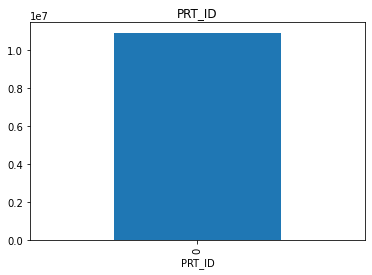

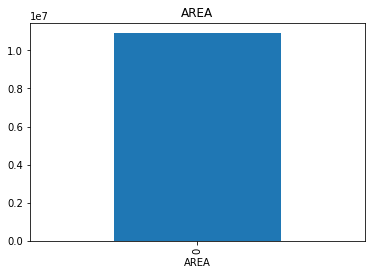

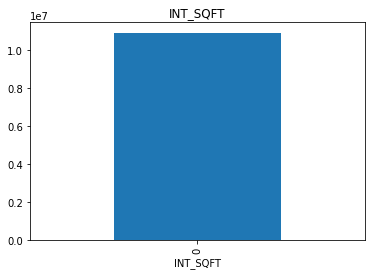

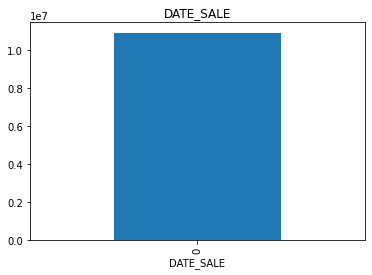

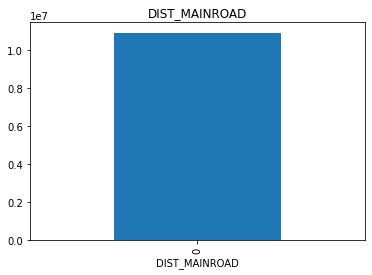

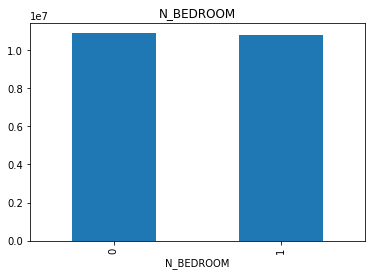

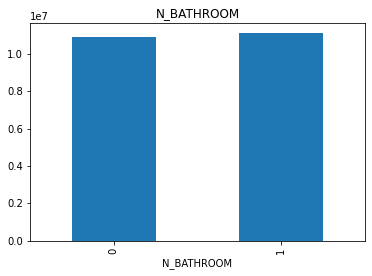

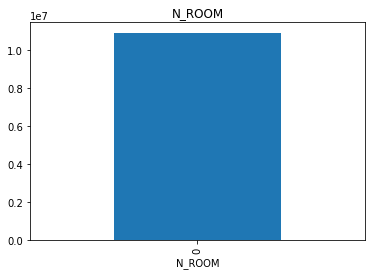

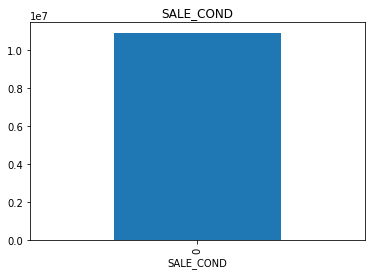

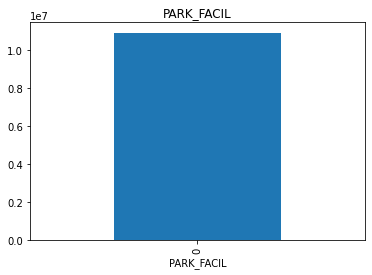

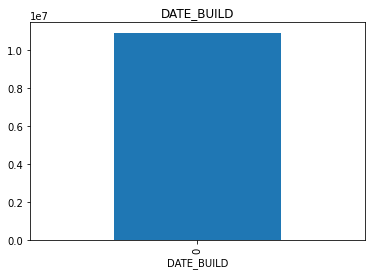

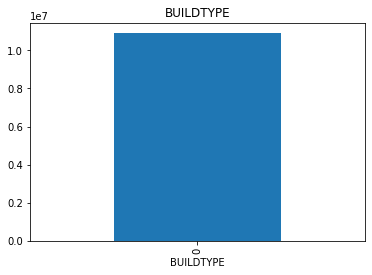

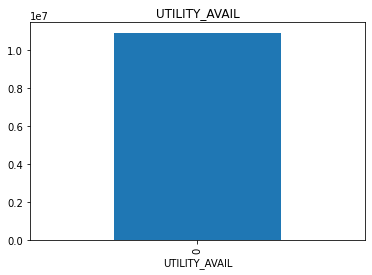

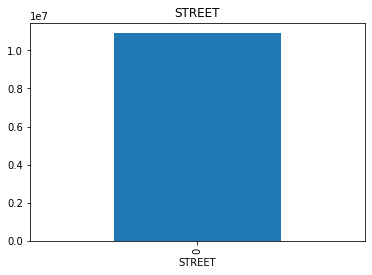

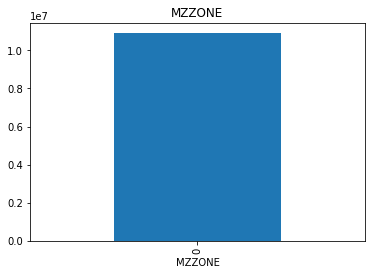

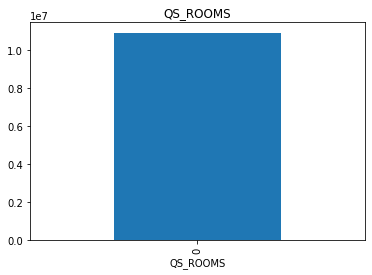

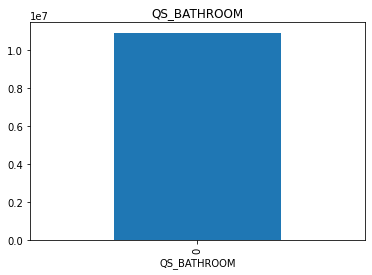

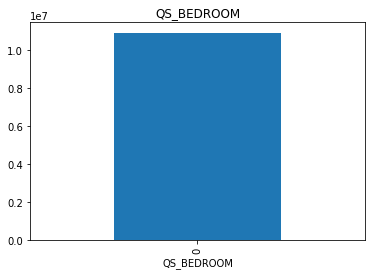

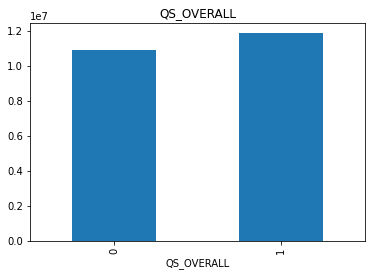

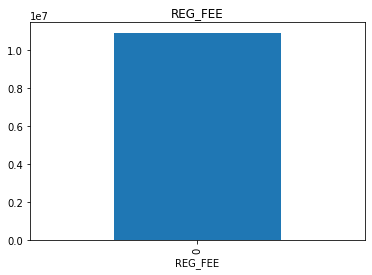

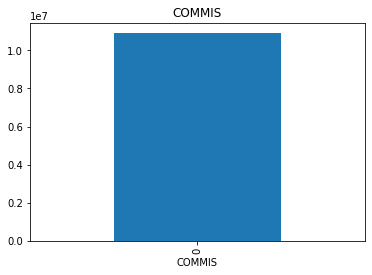

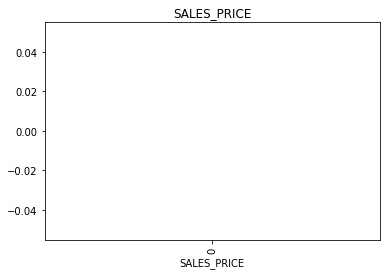

In [ ]:
#let's understand the relationship between missing values and sales price
for feature in features_with_na:
  data=dataset.copy()

  #let's make a variable that indicates 1 if the values are missing 
  data[feature]=np.where(data[feature].isnull(),1,0)

  #let's calculate the mean SalesPrice where the infomation is missing
  data.groupby(feature)['SALES_PRICE'].mean().plot.bar()
  plt.title(feature)
  plt.show()

Interpretation : Here with the relation between the missing values and the dependent variable is clearly visible.
we can either replace the nan values or we can drop these columns

In [ ]:
#dropping the colunm which is not required
dataset.drop(['QS_OVERALL','PRT_ID'],axis=1)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,208767,107060,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,346191,205551,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,317354,167028,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,425350,119098,8507000


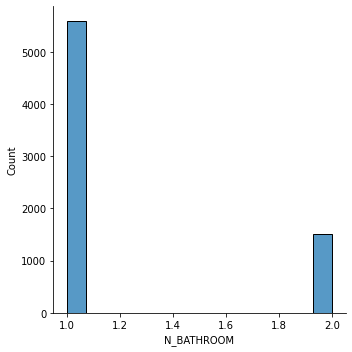

In [ ]:
#finding the distribution of the column that has missing value(s)
sns.displot(dataset.N_BATHROOM )


In [ ]:
#replace the missing values with mode
dataset['N_BATHROOM'].fillna(dataset['N_BATHROOM'].mode(),inplace=True)



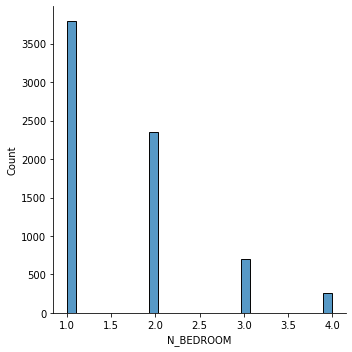

In [ ]:
sns.displot(dataset.N_BEDROOM)

In [ ]:
##replace the missing values with mode
dataset['N_BEDROOM'].fillna(dataset['N_BEDROOM'].mode(),inplace=True)



In [ ]:
#listing out the numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables:',len(numerical_features))

#visualize the numerical features
data=dataset[numerical_features]
data.head(2)



Number of numerical variables: 12


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,144400,7600000
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,304049,21717770


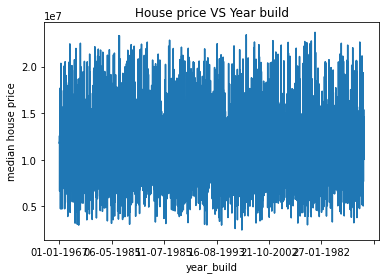

In [ ]:
#checking the relation between date_build and sales_price
dataset.groupby('DATE_BUILD')['SALES_PRICE'].median().plot()
plt.xlabel('year_build')
plt.ylabel('median house price')
plt.title('House price VS Year build')
plt.show()

there is a relation between date_build and sales_price

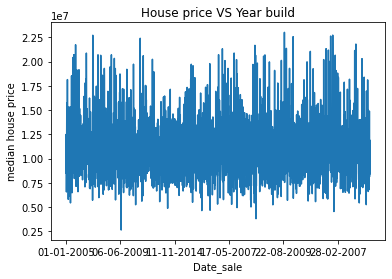

In [ ]:
#checking the relation between date_sale and sales_price
dataset.groupby('DATE_SALE')['SALES_PRICE'].median().plot()
plt.xlabel('Date_sale')
plt.ylabel('median house price')
plt.title('House price VS Year build')
plt.show()

there is a relation between date_build and sales_price

In [ ]:
#finding the discrete variables  in the dataset

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 ]
print('discrete features count:{}'.format(len(discrete_feature)))

discrete features count:3


In [ ]:
discrete_feature

['N_BEDROOM', 'N_BATHROOM', 'N_ROOM']

In [ ]:
dataset[discrete_feature].head()

,N_BEDROOM,N_BATHROOM,N_ROOM
0,1.0,1.0,3
1,2.0,1.0,5
2,1.0,1.0,3
3,3.0,2.0,5
4,1.0,1.0,3


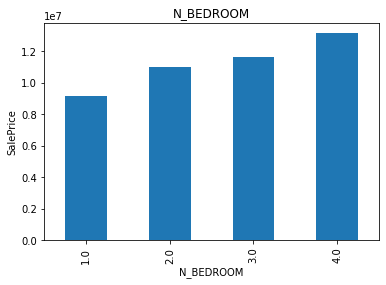

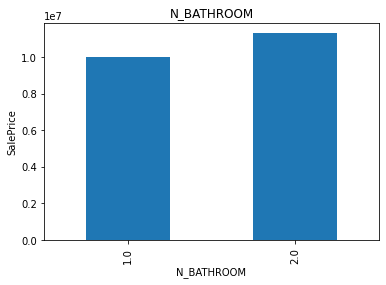

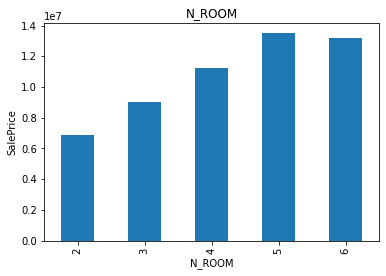

In [ ]:
## Lets Find the realtionship between discrete variables and Sale Price

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SALES_PRICE'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Interpretation : There is a linear relationship between variables number and salesprice

In [ ]:
continuous_feature=[feature for feature in numerical_features]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 12


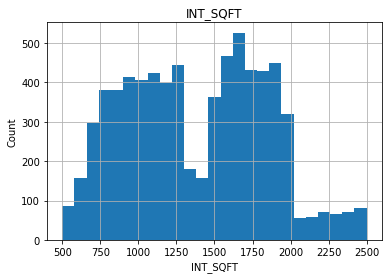

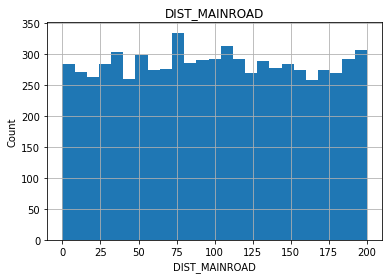

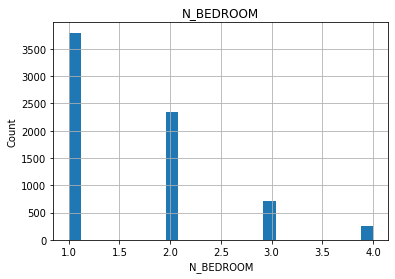

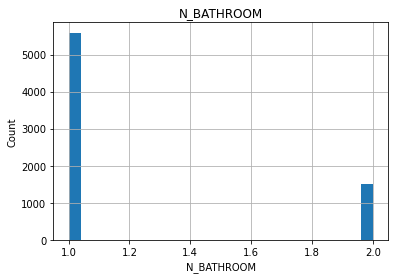

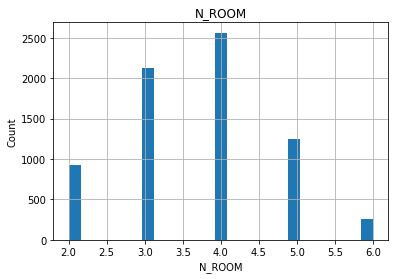

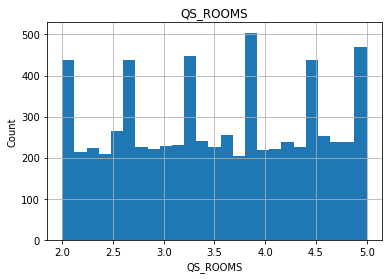

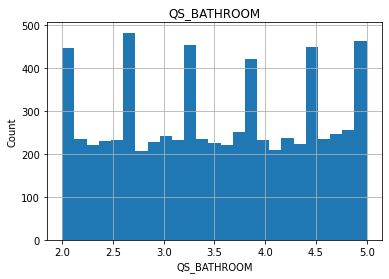

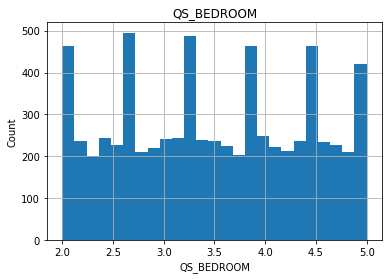

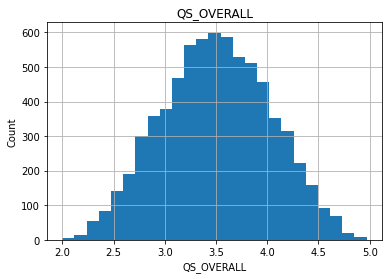

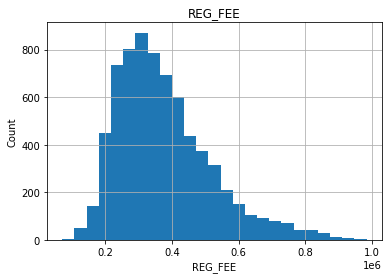

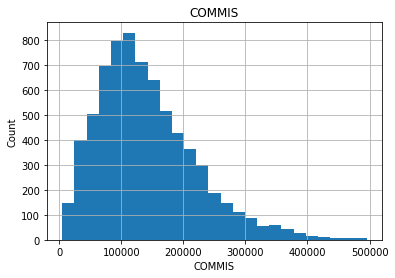

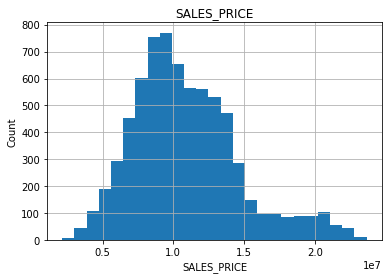

In [ ]:

## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Interpretation : There is a relationship between variables number and salesprice

In [ ]:
#finding the count of different labels
dataset['SALE_COND'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

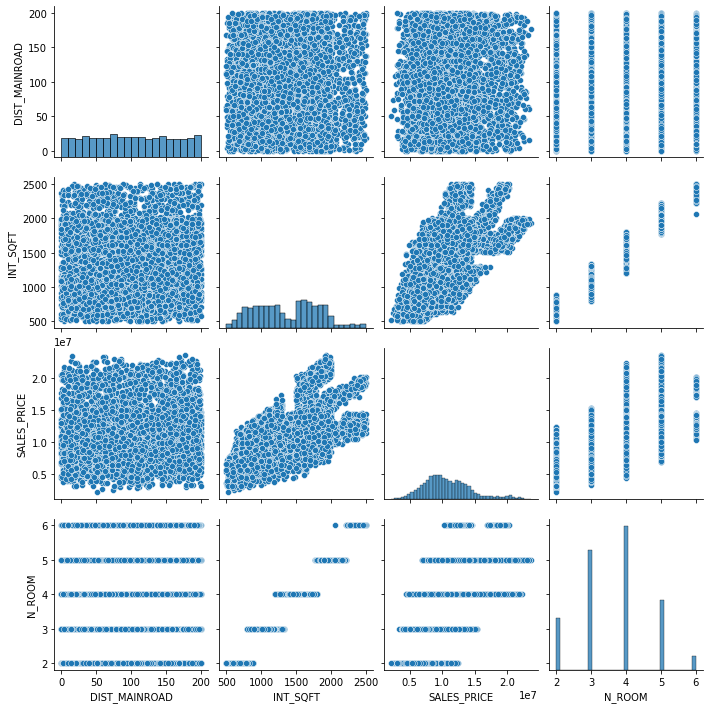

In [ ]:
#finding the relations between features
df=dataset[['DIST_MAINROAD','INT_SQFT','SALES_PRICE','N_ROOM']]
sns.pairplot(df, kind='scatter')
plt.show()

Text(0.5, 1.0, 'Multi-Collinearity of House attributes')

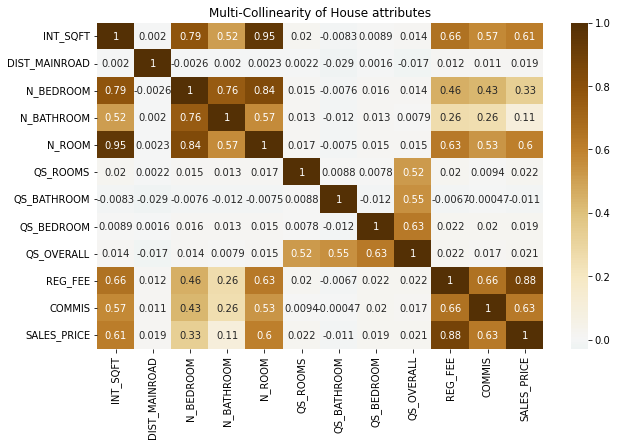

In [ ]:
#finding the correlations
fig, ax=plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(), center=0, cmap='BrBG_r',annot=True)

ax.set_title('Multi-Collinearity of House attributes')
#inference: the value 1 represent the features are highly corelated

In [ ]:
correlation=dataset.corr()
correlation

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,parking
INT_SQFT,1.000000,0.002022,0.786348,0.515390,0.951279,0.019850,-0.008337,0.008865,0.014025,0.657544,0.571076,0.612125,0.004853
DIST_MAINROAD,0.002022,1.000000,-0.002566,0.001970,0.002301,0.002237,-0.029468,0.001554,-0.017313,0.011600,0.010994,0.018783,-0.009401
N_BEDROOM,0.786348,-0.002566,1.000000,0.755214,0.840286,0.015112,-0.007635,0.015569,0.014209,0.455357,0.430424,0.330999,-0.009345
N_BATHROOM,0.515390,0.001970,0.755214,1.000000,0.568688,0.013112,-0.012057,0.013196,0.007907,0.260324,0.256533,0.108884,-0.014118
N_ROOM,0.951279,0.002301,0.840286,0.568688,1.000000,0.016524,-0.007545,0.015072,0.015459,0.630932,0.533343,0.602760,-0.000848
QS_ROOMS,0.019850,0.002237,0.015112,0.013112,0.016524,1.000000,0.008828,0.007789,0.517741,0.019739,0.009377,0.021967,-0.008482
QS_BATHROOM,-0.008337,-0.029468,-0.007635,-0.012057,-0.007545,0.008828,1.000000,-0.011745,0.551125,-0.006719,-0.000471,-0.011377,-0.011704
QS_BEDROOM,0.008865,0.001554,0.015569,0.013196,0.015072,0.007789,-0.011745,1.000000,0.630447,0.021526,0.020118,0.018804,-0.000890
QS_OVERALL,0.014025,-0.017313,0.014209,0.007907,0.015459,0.517741,0.551125,0.630447,1.000000,0.022482,0.017004,0.020556,-0.009455
REG_FEE,0.657544,0.011600,0.455357,0.260324,0.630932,0.019739,-0.006719,0.021526,0.022482,1.000000,0.659903,0.878148,0.139795


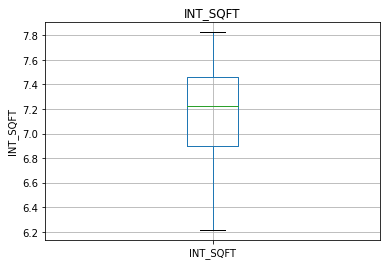

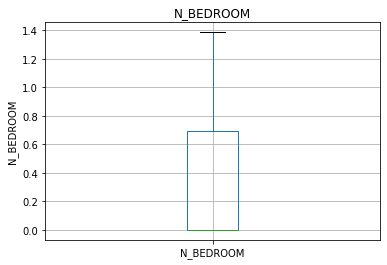

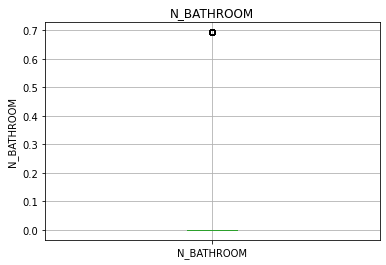

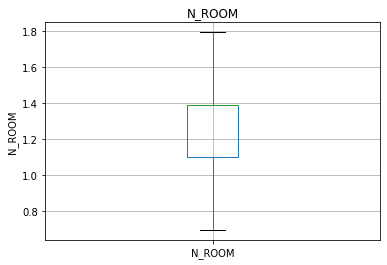

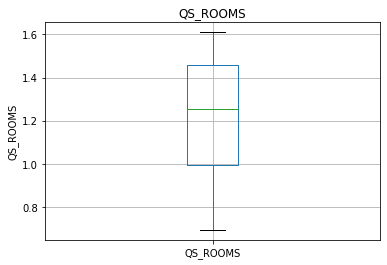

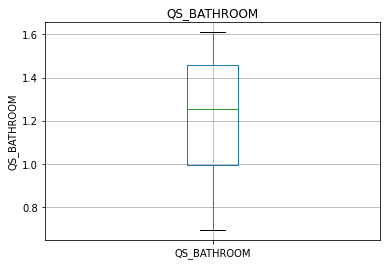

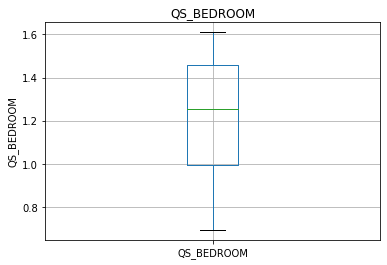

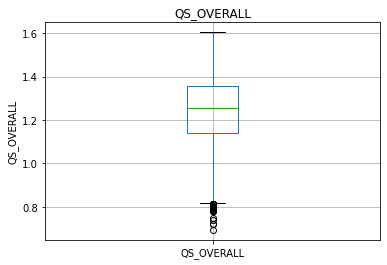

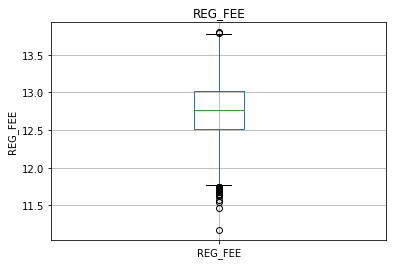

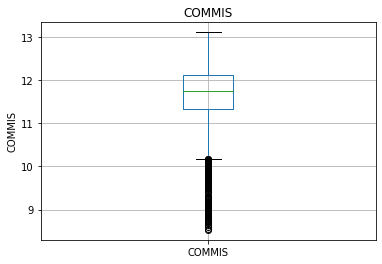

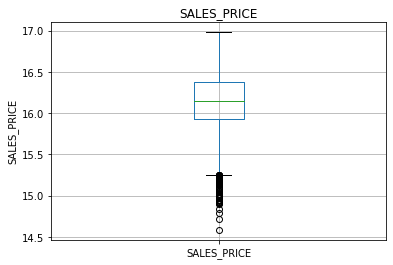

In [ ]:
#finding the outliers
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

there is a  outlier 

In [ ]:
#finding the categorical_features
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['PRT_ID',
 'AREA',
 'DATE_SALE',
 'SALE_COND',
 'PARK_FACIL',
 'DATE_BUILD',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [ ]:
dataset[categorical_features].head(3)

,PRT_ID,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,Karapakkam,04-05-2011,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A
1,P09411,Anna Nagar,19-12-2006,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH
2,P01812,Adyar,04-02-2012,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL


In [ ]:
#encoding the categorical data
from sklearn.preprocessing import OneHotEncoder
hot_encode= OneHotEncoder()

In [ ]:
label_=hot_encode.fit_transform(dataset[categorical_features])

In [ ]:
#finding the unique features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is PRT_ID and number of categories are 7109
The feature is AREA and number of categories are 17
The feature is DATE_SALE and number of categories are 2798
The feature is SALE_COND and number of categories are 9
The feature is PARK_FACIL and number of categories are 3
The feature is DATE_BUILD and number of categories are 5808
The feature is BUILDTYPE and number of categories are 5
The feature is UTILITY_AVAIL and number of categories are 5
The feature is STREET and number of categories are 5
The feature is MZZONE and number of categories are 6


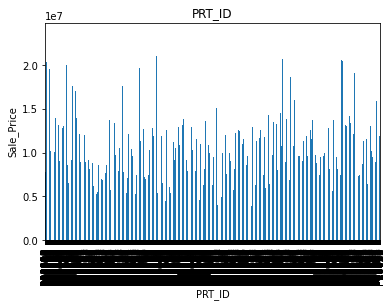

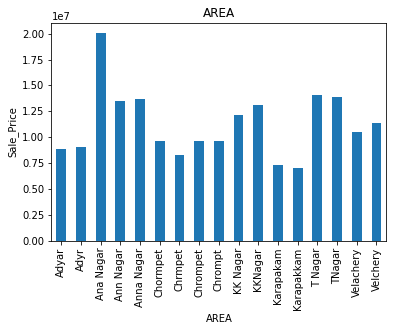

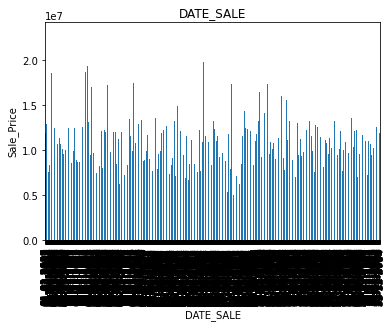

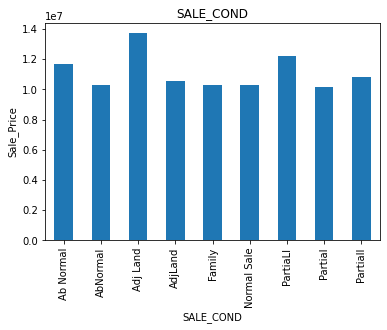

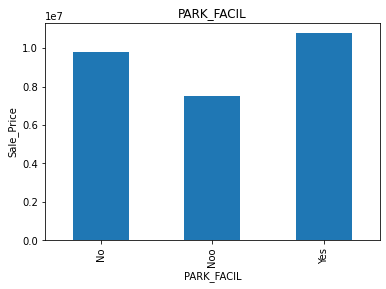

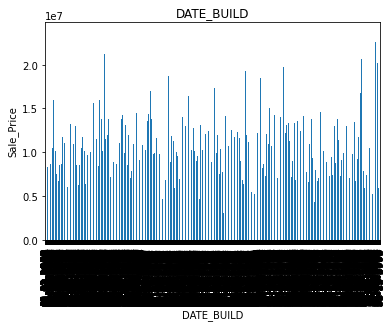

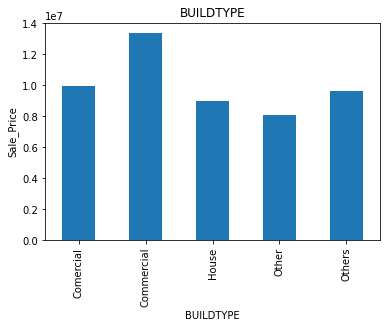

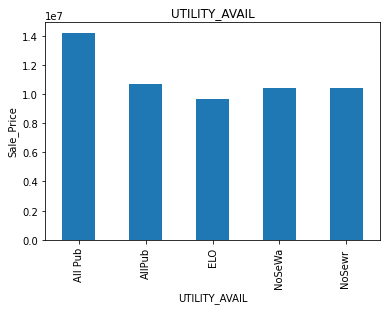

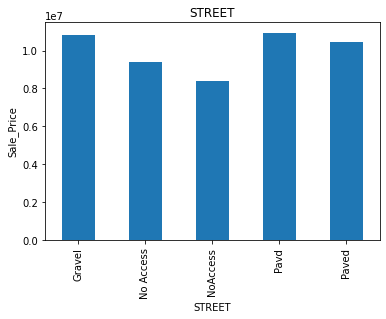

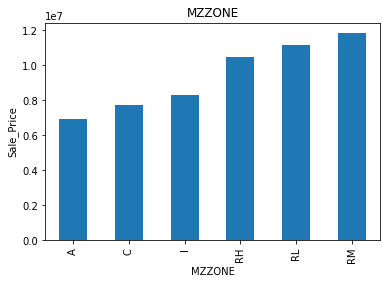

In [ ]:
#relations between salesprice and categorical features
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SALES_PRICE'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale_Price')
    plt.title(feature)
    plt.show()

there is a linear relation between these graphs

In [ ]:
dataset.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
parking            int64
dtype: object

In [ ]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['PRT_ID','SALES_PRICE'] ]
len(scaling_feature)

21

In [ ]:
scaling_feature

['AREA',
 'INT_SQFT',
 'DATE_SALE',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'SALE_COND',
 'PARK_FACIL',
 'DATE_BUILD',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'REG_FEE',
 'COMMIS',
 'parking']

In [ ]:
#listing out the numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables:',len(numerical_features))

#visualize the numerical features
data=dataset[numerical_features]

data.head(2)


Number of numerical variables: 13


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,parking
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,144400,7600000,2
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,304049,21717770,0


In [ ]:
## Capture the dependent feature
y=data[['SALES_PRICE']]

In [ ]:
X=data.drop(columns=['SALES_PRICE','N_BEDROOM','N_BATHROOM','QS_OVERALL'])

In [ ]:
#spliting the dataset into train and test
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
#finding the shapes
print(X.shape, X_train.shape, X_test.shape)

(7109, 9) (5687, 9) (1422, 9)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Model Training

XGBoost Regressor

[ ]


In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with X_train
model.fit(X_train, y_train)

[08:10:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[ 8652086.  20547804.   7599420.5 ... 11629260.  10468294.  15435696. ]


In [ ]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8489464757104641
Mean Absolute Error :  1119431.7995867769


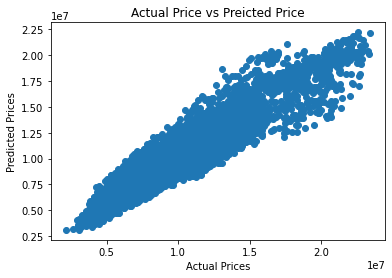

In [ ]:
#Visualizing the actual Prices and predicted prices
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [ ]:
#Prediction on Test Data
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [ ]:
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.8271371384099465
Mean Absolute Error :  1217906.6731715894


Linear Regression

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [ ]:
reg.fit(X_train,y_train)
reg.score(X_test,y_test)
reg.coef_


array([[-4.26871823e+05,  4.16841297e+04,  6.03489431e+05,
         2.29683883e+04,  1.73398293e+03, -4.72751041e+03,
         3.00439842e+06,  2.84049688e+05,  1.03744982e+05]])